# This notebook covers the script of formating tables to latex

# Anchor evaluation

## Do ture anchors help? Using BLESS oracle anchors

In [1]:
import pandas as pd
pd.set_option('display.max.columns', 100)
pd.set_option('display.max.colwidth', 500)

In [ ]:
import pandas as pd 
path = '../log/paper_results/221208_bless_true_anchors.csv'
df = pd.read_csv(path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed*')]
# for name, group in df.groupby('mask_type'):
#     display(group)
# print (df.columns)

cols = ['mask_type',  'p@1', 'p@5', 'p@10','mrr'] #, 'relation', 'filter_anchors',
       #'anchor_wordnet_avg_path', 'anchor_wordnet_coverage', 'label',
       #'dataset', ],

df = df.query("filter_anchors=='RAW'")[cols]

prompt_rename = {'def_sap': '\sapd', 'lsp_sap': r'\sapl', 'def_dap': r'\dapd', 'lsp_dap': u'\dapl'}
cols_rename = {'mask_type': 'Prompt', 'filter_anchors': 'Scorer', 'p@1': 'P@1', 'p@5': 'P@5', 'p@10': 'P@10', 'mrr': 'MRR'}

df['mask_type'] = df['mask_type'].apply(lambda x: prompt_rename.get(x))
df = df.rename(columns=cols_rename)

df.to_csv(f'{path}.latex.tex')
print(df.to_latex(index=False, escape=False))

# ['mask_type', 'p@1', 'p@5', 'p@10', 'mrr' 'anchor_wordnet_avg_path', 'anchor_wordnet_coverage' ]

## How's the quality of anchors of differnt anchor scorer? Evaluated on BLESS hyponym-hyponym pairs

In [ ]:
path = '../log/paper_results/221209_bless_anchor_scorers_ablation.csv'
df = pd.read_csv(path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed*')]

anchor_label_col = 'sub_sister'
df = df.query(f"label == '{anchor_label_col}'")
# display(df.head())

cols_rename = {'mask_type': 'Prompt', 'p@1': 'P@1', 'p@5': 'P@5', 'p@10': 'P@10', 'mrr': 'MRR', 'filter_anchors': 'Scorer'}
df = df.rename(columns=cols_rename)


scorer_rename = {'RAW': '$s_{LM}$', 'CPT': r'+$s_{cpt}$', 'WN': "+$s_{wnp}$"}
df['Scorer'] = df['Scorer'].apply(lambda x: scorer_rename.get(x))
cols = ['Scorer', 'P@1', 'P@5', 'P@10','MRR'] #, 'anchor_wordnet_coverage'] 
df = df[cols]#.sort_values('mask_type')
df.pivot(index=['Scorer' ], columns=['P@1', 'P@5', 'P@10', 'MRR']) #, 'anchor_wordnet_coverage'])
display(df)
print(df.to_latex(escape=False, index=False))

## How's the quality of anchors of differnt anchor scorer? Evaluated on BLESS hyponym-hypernym pairs

In [1]:
path = '../log/paper_results/221209_bless_anchor_scorers_ablation.csv'
df = pd.read_csv(path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed*')]

# for name, group in df.groupby('mask_type'):
#     display(group)

    
df1 = df.query("mask_type=='def_sap' and filter_anchors=='RAW'")
df2 = df.query("mask_type=='lsp_sap' and filter_anchors=='RAW'")
df3 = df.query("mask_type=='def_dap'")
df4 = df.query("mask_type=='lsp_dap'")

dfs = pd.concat([df1, df2, df3, df4])

prompt_rename = {'def_sap': '\sapd', 'lsp_sap': r'\sapl', 'def_dap': r'\dapd', 'lsp_dap': u'\dapl'}
cols_rename = {'mask_type': 'Prompt', 'p@1': 'P@1', 'p@5': 'P@5', 'p@10': 'P@10', 'mrr': 'MRR', 'filter_anchors': 'Scorer'}

dfs['mask_type'] = dfs['mask_type'].apply(lambda x: prompt_rename.get(x))
dfs = dfs.rename(columns=cols_rename)


scorer_rename = {'RAW': '$s_{LM}$', 'CPT': r'$s_{cpt}$', 'WN': "+$s_{wnp}$"}
dfs['Scorer'] = dfs['Scorer'].apply(lambda x: scorer_rename.get(x))
cols = ['Prompt', 'Scorer', 'P@1', 'P@5', 'P@10','MRR'] 
dfs = dfs[cols]#.sort_values('mask_type')
dfs.pivot(index=['Prompt','Scorer' ], columns=['P@1', 'P@5', 'P@10', 'MRR'])
display(dfs)
print(dfs.to_latex(escape=False, index=False))

# display(dfs.head(20))
# dfs.to_csv(f'{path}.latex.tex')

# df.pivot(columns='mask_type', values=['mrr', 'p@1', 'p@5', 'p@10'])

NameError: name 'pd' is not defined

## How's the quality of anchors? Evaluated on WordNet sister terms

In [11]:
import pandas as pd 
from df_to_latex import DataFrame2Latex

dataset_rename = {
    'hypernymsuite-BLESS': 'BLESS',
    'clsb-singular': 'CLSB',
    'hypernymsuite-EVAL': "EVAL",
    'hypernymsuite-LEDS': "LEDS",
    'hypernymsuite-SHWARTZ': "SHWARTZ",
    'lm_diagnostic_extended-singular': "DIAG"}

# path = '../log/paper_results/221208_all_datasets_anchor_log.csv'
path = '../../log/230116_all_datasets_anchor_log.csv'
df_orig = pd.read_csv(path)
df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
df_orig['dataset'] = df_orig['dataset'].apply(lambda x: dataset_rename.get(x))

df_orig = df_orig.query("filter_anchors=='WN'")
# df_orig = df_orig.query("filter_anchors=='RAW'")
display(df_orig)


df = []
dataset_list = ['BLESS', 'DIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS']
for name in dataset_list:
    group = df_orig.query(f"dataset == '{name}' and filter_anchors=='WN'")
    df.append(group[['dataset','mrr', 'p@1', 'p@5', 'p@10']])

df = pd.concat(df) #, axis=1)#.iloc[:, 1:]
display(df)

DataFrame2Latex(df=df, label=f'tab:anchor_quality_in_wordnet', 
            caption=f'Experimental results of evaluating mined anchors on WordNet sisters. The P@K and MRR are measured by the coordinates in WrodNet ($z$ and $x$ share the lowest hypernym up to 6 hops.', 
            output_file= None , #'../log/paper_results/latex.test.tex',
            adjustbox_width = 'textwidth',
            precision = 1,
            column_format='l|cccc',
            multicolumn_format='',
            hide_index=True
            )

# print(df.to_latex(column_format='l|lll|lll|lll|lll|lll', multicolumn_format='c|',index=False, escape=False)) #column_format='c'))#, caption='', label=''))


,dataset,mask_type,p@1,p@5,p@10,mrr,anchor_wordnet_avg_path,anchor_wordnet_coverage,filter_anchors
6,BLESS,anchor_col_all,65.2,81.4,81.4,72.5,4.40,0.999,WN
7,DIAG,anchor_col_all,23.3,32.3,32.3,27.6,7.13,0.983,WN
8,CLSB,anchor_col_all,57.1,73.3,73.3,64.6,4.75,0.982,WN
9,LEDS,anchor_col_all,57.9,73.4,73.5,65.2,4.90,0.979,WN
10,EVAL,anchor_col_all,76.9,94.4,94.4,85.1,3.78,0.998,WN
11,SHWARTZ,anchor_col_all,26.0,31.2,31.3,28.4,4.96,0.441,WN


,dataset,mrr,p@1,p@5,p@10
6,BLESS,72.5,65.2,81.4,81.4
7,DIAG,27.6,23.3,32.3,32.3
8,CLSB,64.6,57.1,73.3,73.3
11,SHWARTZ,28.4,26.0,31.2,31.3
10,EVAL,85.1,76.9,94.4,94.4
9,LEDS,65.2,57.9,73.4,73.5


2
15
\begin{table*}[!h]
\centering
\begin{adjustbox}{width=\textwidth}
\label{tab:anchor_quality_in_wordnet}
\begin{tabular}{l|cccc}
\toprule
dataset & mrr & p@1 & p@5 & p@10 \\
\midrule
BLESS & 72.5 & 65.2 & 81.4 & 81.4 \\
DIAG & 27.6 & 23.3 & 32.3 & 32.3 \\
CLSB & 64.6 & 57.1 & 73.3 & 73.3 \\
\textbf{SHWARTZ} & 28.4 & 26.0 & 31.2 & 31.3 \\
EVAL & \textbf{85.1} & \textbf{76.9} & \textbf{94.4} & \textbf{94.4} \\
LEDS & 65.2 & 57.9 & 73.4 & 73.5 \\
\bottomrule
\end{tabular}
 \end{adjustbox}
\caption{Experimental results of evaluating mined anchors on WordNet sisters. The P@K and MRR are measured by the coordinates in WrodNet ($z$ and $x$ share the lowest hypernym up to 6 hops.}
\end{table*}



In [12]:
import pandas as pd 
from df_to_latex import DataFrame2Latex

dataset_rename = {
    'hypernymsuite-BLESS': 'BLESS',
    'clsb-singular': 'CLSB',
    'hypernymsuite-EVAL': "EVAL",
    'hypernymsuite-LEDS': "LEDS",
    'hypernymsuite-SHWARTZ': "SHWARTZ",
    'lm_diagnostic_extended-singular': "LMDIAG"}

# path = '../log/paper_results/221208_all_datasets_anchor_log.csv'
path = '../../log/230116_all_datasets_anchor_log.csv'
df_orig = pd.read_csv(path)
df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
df_orig['dataset'] = df_orig['dataset'].apply(lambda x: dataset_rename.get(x))

# df_orig = df_orig.query("mask_type=='RAW'")

df = []
dataset_list = ['BLESS', 'LMDIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS']
# for name, group in df_orig.groupby('dataset'):
for name in dataset_list:
    group = df_orig.query(f"dataset == '{name}'")
    group_p = group.pivot_table(index='filter_anchors', columns=['dataset'], values=[ 'p@1', 'p@5', 'p@10', 'mrr']) #'p@1',
    group_p = group_p.swaplevel(0,1, axis=1).sort_index(axis=1) 
#     group_p['filter_anchors'] = group_p.index
    df.append(group_p)
df = pd.concat(df, axis=1)#.iloc[:, 1:]

display(df)

cols_rename = {'mask_type': 'Prompt', 'filter_anchors': 'Scorer', 'p@1': 'P@1', 'p@5': 'P@5', 'p@10': 'P@10', 'mrr': 'MRR'}


df = df.rename(columns=cols_rename)
df = df.reindex(['RAW', 'CPT', 'WN'])
df['Scorer'] = df.index


scorer_rename = {'RAW': '$s_{LM}$', 'CPT': r'+$s_{cpt}$', 'WN': "+$s_{wnp}$"}

df_cols =df.columns.tolist() 
df_new_cols=df_cols[-1:]+df_cols[:-1] 
print(df_new_cols)
df = df[df_new_cols]
df['Scorer'] = df['Scorer'].apply(lambda x: scorer_rename.get(x))
display(df.reset_index(drop=False))

# DataFrame2Latex(df=df, label=f'tab:anchor_quality_in_wordnet', 
#             caption=f'Experimental results of evaluating mined anchors on WordNet sisters. The P@K and MRR are measured by the coordinates in WrodNet ($z$ and $x$ share the lowest hypernym up to 6 hops.', 
#             output_file= None , #'../log/paper_results/latex.test.tex',
#             adjustbox_width = 'textwidth',
#             precision = 1,
#             column_format='l|ll|ll|ll|ll|ll|ll',
#             multicolumn_format='c|',
#             hide_index=True
#             )

# # print(df.to_latex(column_format='l|lll|lll|lll|lll|lll', multicolumn_format='c|',index=False, escape=False)) #column_format='c'))#, caption='', label=''))
# display(df_orig)


dataset        BLESS                   LMDIAG                    CLSB        \
                 mrr   p@1  p@10   p@5    mrr   p@1  p@10   p@5   mrr   p@1   
filter_anchors                                                                
CPT             46.1  37.0  67.3  60.4   12.2   9.0  19.8  16.8  38.4  29.7   
RAW             47.8  40.4  69.9  56.7   12.1   8.9  19.8  16.8  38.0  30.3   
WN              72.5  65.2  81.4  81.4   27.6  23.3  32.3  32.3  64.6  57.1   

dataset         ... SHWARTZ        EVAL                    LEDS              \
                ...    p@10   p@5   mrr   p@1  p@10   p@5   mrr   p@1  p@10   
filter_anchors  ...                                                           
CPT             ...     NaN   NaN  46.2  33.1  77.4  63.5  33.4  23.9  54.8   
RAW             ...    21.3  16.7  43.5  31.0  74.3  59.7  31.7  22.8  53.1   
WN              ...    31.3  31.2  85.1  76.9  94.4  94.4  65.2  57.9  73.5   

dataset               
                 p@5  
filter_anchors        
CPT             46.0  
RAW             43.3  
WN              73.4  

[3 rows x 24 columns]

[('Scorer', ''), ('BLESS', 'MRR'), ('BLESS', 'P@1'), ('BLESS', 'P@10'), ('BLESS', 'P@5'), ('LMDIAG', 'MRR'), ('LMDIAG', 'P@1'), ('LMDIAG', 'P@10'), ('LMDIAG', 'P@5'), ('CLSB', 'MRR'), ('CLSB', 'P@1'), ('CLSB', 'P@10'), ('CLSB', 'P@5'), ('SHWARTZ', 'MRR'), ('SHWARTZ', 'P@1'), ('SHWARTZ', 'P@10'), ('SHWARTZ', 'P@5'), ('EVAL', 'MRR'), ('EVAL', 'P@1'), ('EVAL', 'P@10'), ('EVAL', 'P@5'), ('LEDS', 'MRR'), ('LEDS', 'P@1'), ('LEDS', 'P@10'), ('LEDS', 'P@5')]


dataset filter_anchors      Scorer BLESS                   LMDIAG              \
                                     MRR   P@1  P@10   P@5    MRR   P@1  P@10   
0                  RAW    $s_{LM}$  47.8  40.4  69.9  56.7   12.1   8.9  19.8   
1                  CPT  +$s_{cpt}$  46.1  37.0  67.3  60.4   12.2   9.0  19.8   
2                   WN  +$s_{wnp}$  72.5  65.2  81.4  81.4   27.6  23.3  32.3   

dataset        ... SHWARTZ        EVAL                    LEDS              \
          P@5  ...    P@10   P@5   MRR   P@1  P@10   P@5   MRR   P@1  P@10   
0        16.8  ...    21.3  16.7  43.5  31.0  74.3  59.7  31.7  22.8  53.1   
1        16.8  ...     NaN   NaN  46.2  33.1  77.4  63.5  33.4  23.9  54.8   
2        32.3  ...    31.3  31.2  85.1  76.9  94.4  94.4  65.2  57.9  73.5   

dataset        
          P@5  
0        43.3  
1        46.0  
2        73.4  

[3 rows x 26 columns]

## How does the anchor number affect the performance of hypernym extraction? 
-

In [ ]:
path ='../log/paper_results/221209_lmdai_anchor_num_ablation.csv'

df_orig = pd.read_csv(path)
df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
# query_
# df_orig = df_orig.query("mask_type in ")
# df_orig.pivot(index='mask_type', columns=['p@1']).plot()
# df_orig.plot()

for name, group in df_orig.groupby(['top_k_anchors']): #, "mask_type"]):
    display(group)
#     display(group[['mask_type', 'p@1', 'p@5', 'mrr']].plot(kind='bar', title=name))

## Qualitative Analysis on anchors

In [ ]:

path = '../log/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_False_wnp_True_cpt_False.BLESS.csv'
df = pd.read_csv(path)
df['sub_sister'] = df['sub_sister'].apply(lambda x: eval(x))
df['subj_anchors'] = df['subj_anchors'].apply(lambda x: eval(x))
df['subj_anchors_sg'] = df['subj_anchors_sg'].apply(lambda x: eval(x))

df_groups = []
for name, group in df.groupby('sub_label_sg'):
    df_groups.append({"sub_label": name, 'sub_sister': group['sub_sister'].values, 'subj_anchors_sg': group['subj_anchors_sg'].values[0], 'subj_anchors': group['subj_anchors'].values[0],  })
# df.head()
df_groups = pd.DataFrame(df_groups)
df_groups['sub_sister'] = df_groups['sub_sister'].apply(lambda x: [item[0] for i, item in enumerate(x) if i!=0])
df_groups['subj_anchors_sg'] = df_groups['subj_anchors_sg'].apply(lambda x: [item for i, item in enumerate(x) if i!=0])
df_groups['subj_anchors'] = df_groups['subj_anchors_sg'].apply(lambda x: [item for i, item in enumerate(x) if i!=0])
# display(df_groups)


def concept_evaluation(label, pred):
    '''
    
    label: a list with the singualr and plural labels (e.g., ['tool', 'tools'])
    pred: the top K prediction list 

    return:
        1 if label share with pred else 0  
    '''
    if not isinstance(label, list):
        label = eval(label)
        
    if not isinstance(pred, list):
        pred = eval(pred)

    shared = set(label).intersection(set(pred))
    return 1 if len(shared)>0 else 0 
    # return len(shared)/len(pred)
    

for k in [1, 5, 10] :
    df_groups[f'p{k}'] = df_groups[['sub_sister', 'subj_anchors']].apply(lambda x: concept_evaluation(x[0], x[1][:k]), axis=1)

display(df_groups[['p1', 'p5', 'p10']].mean())
display(df_groups)

In [ ]:
p1     0.33
p5     0.77
p10    0.84
dtype: float64
p1     0.400
p5     0.825
p10    0.885
dtype: float64
p1     0.525
p5     0.890
p10    0.940
dtype: float64

# Hypernym results

## Main Table (***)

In [5]:
import pandas as pd 
from df_to_latex import DataFrame2Latex 

dataset_rename = {
    'hypernymsuite-BLESS': 'BLESS',
    'hypernymsuite-EVAL': "EVAL",
    'hypernymsuite-LEDS': "LEDS",
    'clsb-singular': 'CLSB',
    'hypernymsuite-SHWARTZ': "SHWARTZ",
    'lm_diagnostic_extended-singular': "DIAG"}

# path = '../log/paper_results/221208_all_datasets_log.csv'
# path = '../../log/221208_all_datasets_log.csv'
path = '../../log/230116_all_datasets_log.csv'
df_orig = pd.read_csv(path)
df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
print(set(df_orig['dataset']))
show_best  = True 
# display(df_orig)
filter_anchors='CPT'

if show_best: 
    df_orig = df_orig.query(f"filter_anchors== '{filter_anchors}'")
    
df_orig_new = pd.concat([df_orig.query(f"mask_type == 'lsp_sap' and filter_anchors == '{filter_anchors}'"), 
                df_orig.query(f"mask_type == 'def_sap' and filter_anchors == '{filter_anchors}'"), 
                df_orig.query("mask_type == 'def_dap'"),
                df_orig.query("mask_type == 'lsp_dap'")])
df_orig = df_orig_new 
# display(df_orig)

cols_rename = {'mask_type': 'Prompt', 'filter_anchors': 'Scorer', 'p@1': 'P@1', 'p@5': 'P@5', 'p@10': 'P@10', 'mrr': 'MRR'}
prompt_rename = {'def_sap': '\dfp', 'lsp_sap': r'\lsp', 'def_dap': r'\dfpa', 'lsp_dap': u'\lspa'}
scorer_rename = {'RAW': '$s_{LM}$', 'CPT': r'+$s_{cpt}$', 'WN': "+$s_{wnp}$"}
df_orig = df_orig.rename(columns=cols_rename)

df_orig['Scorer'] = df_orig['Scorer'].apply(lambda x: scorer_rename.get(x))

df_orig['Prompt'] = df_orig['Prompt'].apply(lambda x: prompt_rename.get(x))
df_orig['dataset'] = df_orig['dataset'].apply(lambda x: dataset_rename.get(x))


df = []
dataset_list = ['BLESS', 'DIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS']
# for name, group in df_orig.groupby('dataset'):
for name in dataset_list:
    group = df_orig.query(f"dataset == '{name}'")
    group_p = group.pivot_table(index=['Prompt'], columns=['dataset'], values=[ 'P@10', 'MRR']) # 'Scorer' , 'P@1',
    group_p = group_p.swaplevel(0,1, axis=1).sort_index(axis=1)
    #     group_p['filter_anchors'] = group_p.index
    df.append(group_p)
df = pd.concat(df, axis=1)#.iloc[:, 1:]
df = df.reindex(['\dfp', '\dfpa', '\lsp',  '\lspa'])
# df = df.sort_values(by=['Prompt'], ascending=False)
# display(df)


# df = df.reindex(['RAW', 'CPT', 'WN'])
# df['Scorer'] = df.index
# df.columns = df.columns.get_level_values(0)
display(df)


# MultiIndex to Single Index
# display(df.reset_index(level=[1], drop=False))

df_latex = DataFrame2Latex(df=df, label=f'tab:main_results_hypernym_extraction', 
            caption=f'Experimental results on various hypernym extraction datasets.', 
            output_file= None , #'../log/paper_results/latex.test.tex',
            adjustbox_width = 'textwidth',
            precision = 1,
            column_format='l|ll|ll|ll|ll|ll|ll',
            multicolumn_format='c|'
            )

# print(df.to_latex(column_format='l|lll|lll|lll|lll|lll|lll', multicolumn_format='c|', escape=False))  #index=False,#column_format='c'))#, caption='', label=''))
display(df_orig)

{'lm_diagnostic_extended-singular', 'hypernymsuite-BLESS', 'hypernymsuite-EVAL', 'hypernymsuite-SHWARTZ', 'hypernymsuite-LEDS', 'clsb-singular'}


dataset BLESS        DIAG        CLSB        EVAL        LEDS      
          MRR  P@10   MRR  P@10   MRR  P@10   MRR  P@10   MRR  P@10
Prompt                                                             
\dfp     23.6  42.4  42.6  66.8  39.8  67.5  24.0  46.7  32.6  60.1
\dfpa    25.7  46.6  45.6  67.2  42.1  70.8  22.3  42.9  36.2  64.6
\lsp     27.1  53.9  45.5  66.1  40.8  68.2  17.3  39.5  33.4  60.5
\lspa    27.0  53.5  42.8  62.7  40.8  68.1  17.4  37.8  34.4  62.0

2
15
\begin{table*}[!h]
\centering
\begin{adjustbox}{width=\textwidth}
\label{tab:main_results_hypernym_extraction}
\begin{tabular}{l|ll|ll|ll|ll|ll|ll}
\toprule
dataset & \multicolumn{2}{c|}{BLESS} & \multicolumn{2}{c|}{DIAG} & \multicolumn{2}{c|}{CLSB} & \multicolumn{2}{c|}{EVAL} & \multicolumn{2}{c|}{LEDS} \\
 & MRR & P@10 & MRR & P@10 & MRR & P@10 & MRR & P@10 & MRR & P@10 \\
Prompt &  &  &  &  &  &  &  &  &  &  \\
\midrule
\dfp & 23.6 & 42.4 & 42.6 & 66.8 & 39.8 & 67.5 & \textbf{24.0} & \textbf{46.7} & 32.6 & 60.1 \\
\dfpa & 25.7 & 46.6 & \textbf{45.6} & \textbf{67.2} & \textbf{42.1} & \textbf{70.8} & 22.3 & 42.9 & \textbf{36.2} & \textbf{64.6} \\
\lsp & \textbf{27.1} & \textbf{53.9} & 45.5 & 66.1 & 40.8 & 68.2 & 17.3 & 39.5 & 33.4 & 60.5 \\
\lspa & 27.0 & 53.5 & 42.8 & 62.7 & 40.8 & 68.1 & 17.4 & 37.8 & 34.4 & 62.0 \\
\bottomrule
\end{tabular}
 \end{adjustbox}
\caption{Experimental results on various hypernym extraction datasets.}
\end{table*}



,Prompt,P@1,P@5,P@10,relation,MRR,anchor_wordnet_avg_path,anchor_wordnet_coverage,label,dataset,Scorer
49,\lsp,17.2,39.3,53.9,IsA,27.1,6.26,0.945,obj_label,BLESS,+$s_{cpt}$
53,\lsp,36.6,57.8,66.1,IsA,45.5,10.29,0.865,obj_label,DIAG,+$s_{cpt}$
57,\lsp,28.6,56.8,68.2,IsA,40.8,7.01,0.938,obj_label,CLSB,+$s_{cpt}$
61,\lsp,22.1,49.4,60.5,IsA,33.4,7.50,0.911,obj_label,LEDS,+$s_{cpt}$
65,\lsp,9.2,28.8,39.5,IsA,17.3,6.04,0.950,obj_label,EVAL,+$s_{cpt}$
48,\dfp,16.4,32.7,42.4,IsA,23.6,6.26,0.945,obj_label,BLESS,+$s_{cpt}$
52,\dfp,32.5,56.6,66.8,IsA,42.6,10.29,0.865,obj_label,DIAG,+$s_{cpt}$
56,\dfp,27.4,56.8,67.5,IsA,39.8,7.01,0.938,obj_label,CLSB,+$s_{cpt}$
60,\dfp,20.6,49.0,60.1,IsA,32.6,7.50,0.911,obj_label,LEDS,+$s_{cpt}$
64,\dfp,14.8,36.0,46.7,IsA,24.0,6.04,0.950,obj_label,EVAL,+$s_{cpt}$


In [ ]:
from matplotlib import rcParams
rcParams['font.family'] = 'times'
import numpy as np 

import seaborn as sns 

sns.set_theme(style="white")
sns.color_palette("husl", 8)

# !pip show matplotlib
from collections import defaultdict 
dataset_list = ['BLESS', 'DIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS'] 
prompt_groups = defaultdict(dict)
for name, group in df_orig[['dataset', 'Prompt', 'P@10', 'MRR']].groupby('Prompt'):
    dataset_to_p10 = dict(zip(group['dataset'], group['P@10']))
    dataset_to_mrr = dict(zip(group['dataset'], group['MRR']))
    print(dataset_to_p10)
    prompt_groups['P@10'][name] = [dataset_to_p10[dataset] for dataset in dataset_list]
    prompt_groups['MRR'][name] = [dataset_to_mrr[dataset] for dataset in dataset_list]
    
prompt_groups


In [ ]:
ttest_rel = {'p10_def_sap .vs p10_lsp_sap': {'BLESS': True, 'DIAG': False, 'CLSB': False, 'LEDS': False, 'EVAL': True, 'SHWARTZ': True}, 
             'p10_def_sap .vs p10_def_dap': {'BLESS': True, 'DIAG': True, 'CLSB': True, 'LEDS': True, 'EVAL': False, 'SHWARTZ': True}, 
             'p10_lsp_sap .vs p10_lsp_dap': {'BLESS': False, 'DIAG': True, 'CLSB': False, 'LEDS': True, 'EVAL': False, 'SHWARTZ': False}, 
             'mrr_def_sap .vs mrr_lsp_sap': {'BLESS': True, 'DIAG': True, 'CLSB': False, 'LEDS': False, 'EVAL': True, 'SHWARTZ': False},
             'mrr_def_sap .vs mrr_def_dap': {'BLESS': True, 'DIAG': True, 'CLSB': True, 'LEDS': True, 'EVAL': False, 'SHWARTZ': False}, 
             'mrr_lsp_sap .vs mrr_lsp_dap': {'BLESS': False, 'DIAG': True, 'CLSB': False, 'LEDS': True, 'EVAL': False, 'SHWARTZ': True}}
ttest_rel_to_markers = [r'$\star$'] 
query_datasets = ['BLESS', 'DIAG', "CLSB", "SHWARTZ", "EVAL", "LEDS"]
group_to_ttest = []

markers_p10 = []
markers_mrr = []

for k,v in ttest_rel.items(): 
    for dataset in query_datasets:
        marker = "+" if v[dataset] == True else "x"
        markers_p10.append(marker) if 'p10' in k else markers_mrr.append(marker)
#     group_to_ttest.append(markers)
# group_to_ttest
#         print(dataset, marker)
print(markers_p10)
print(markers_mrr)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'times'
rcParams['font.size'] = 12
sns.set(style="white") #_theme
sns.color_palette("husl", 8)
from collections import defaultdict

width = 0.9
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4)) #,  sharey=True)#, sharex=True) #,

x1 = np.arange(6)

group1 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\lsp'], prompt_groups['P@10']['\dfp'] )]
group2 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\lspa'], prompt_groups['P@10']['\dfpa'] ) ]
group3 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\dfpa'], prompt_groups['P@10']['\dfp'] ) ]
group4 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\lspa'], prompt_groups['P@10']['\lsp'] ) ]
print("group1", group1)
print("group2", group2)
print("group3", group3)

ax1.bar(x1 - width/3, group1, width=width/3, color='r')
# ax1.bar(x1 + width/2, group2, width=width, color='b')
ax1.bar(x1 , group3, width=width/3, color='g')
ax1.bar(x1 + width/3, group4, width=width/3, color='b')

# ax1.legend([r'$\mathregular{LSP} - \mathregular{DFP}$', r'$\mathregular{DFP^{+A}} - \mathregular{DFP}$', r'$\mathregular{LSP^{+A}} - \mathregular{LSP}$'], loc='lower left')
ax1.set_xticklabels([" "]+dataset_list, rotation=90)
# ax1.set_title("patterns affects")
ax1.set_ylabel(r"Δ P@10 (%)")

for i, bar in enumerate(ax1.patches):
  #print(i, format(bar.get_height(), '.2f'))
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  #     ax1.annotate(format(group_to_ttest[i],

  #ax1.annotate(format(bar.get_height(), '.2f'),
  ax1.annotate(markers_p10[i],
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()/2), ha='center', va='center',
                   size=10, 
                   xytext=(0,8 ),
                   textcoords='offset points')
    
ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=True,
    labelbottom=True) # labels along the bottom edge are off
# Group Performancy by frequency level 
################## draw MRR 
group1 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\lsp'], prompt_groups['MRR']['\dfp'] )]
group2 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\lspa'], prompt_groups['MRR']['\dfpa'] ) ]
group3 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\dfpa'], prompt_groups['MRR']['\dfp'] ) ]
group4 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\lspa'], prompt_groups['MRR']['\lsp'] ) ]

ymin, ymax = min(group1+ group3 + group4), max(group1+ group3 + group4)
ax2.set_ylim(ymin, ymax)
ax2.bar(x1 - width/3, group1, width=width/3, color='r')
# ax2.bar(x1 + width/2, group2, width=width, color='b')
ax2.bar(x1 , group3, width=width/3, color='g')
ax2.bar(x1 + width/3, group4, width=width/3, color='b')

for i, bar in enumerate(ax2.patches):
  #print(i, format(bar.get_height(), '.2f'))
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  #     ax1.annotate(format(group_to_ttest[i],

  #ax1.annotate(format(bar.get_height(), '.2f'),
  ax2.annotate(markers_mrr[i],
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()/2), ha='center', va='center',
                   size=10, 
                   xytext=(0, 8),
                   textcoords='offset points')
    

ax2.legend([r'$\mathregular{LSP} - \mathregular{DFP}$', r'$\mathregular{DFP^{+A}} - \mathregular{DFP}$', r'$\mathregular{LSP^{+A}} - \mathregular{LSP}$']) #, loc='lower left')
ax2.set_xticks(x1)
ax2.set_xticklabels(labels=dataset_list, rotation=90)

# ax2.set_title("patterns affects")
ax2.set_ylabel(r"Δ MRR (%)")

ax2.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    left=True
) # labels along the bottom edge are off

plt.tight_layout()
plt.savefig("../log/paper_results/hypernym_main_results_visualizaion.pdf")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'times'
rcParams['font.size'] = 12
sns.set(style="white") #_theme
sns.color_palette("husl", 8)

width = 0.72
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))#, sharex=True) #, sharey=True)


x1 = np.arange(6)

group1 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\lsp'], prompt_groups['P@10']['\dfp'] )]
group2 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\lspa'], prompt_groups['P@10']['\dfpa'] ) ]
group3 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\dfpa'], prompt_groups['P@10']['\dfp'] ) ]
group4 = [y1-y2 for y1, y2 in zip(prompt_groups['P@10']['\lspa'], prompt_groups['P@10']['\lsp'] ) ]


ax1.bar(x1 - width/3, group1, width=width/3, color='r')
# ax1.bar(x1 + width/2, group2, width=width, color='b')
ax1.bar(x1 , group3, width=width/3, color='g')
ax1.bar(x1 + width/3, group4, width=width/3, color='b')

# ax1.legend([r'$\mathregular{LSP} - \mathregular{DFP}$', r'$\mathregular{DFP^{+A}} - \mathregular{DFP}$', r'$\mathregular{LSP^{+A}} - \mathregular{LSP}$'], loc='lower left')
ax1.set_xticklabels([" "]+dataset_list, rotation=90)
# ax1.set_title("patterns affects")
ax1.set_ylabel(r"Δ P@10 (%)")


group1 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\lsp'], prompt_groups['MRR']['\dfp'] )]
group2 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\lspa'], prompt_groups['MRR']['\dfpa'] ) ]
group3 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\dfpa'], prompt_groups['MRR']['\dfp'] ) ]
group4 = [y1-y2 for y1, y2 in zip(prompt_groups['MRR']['\lspa'], prompt_groups['MRR']['\lsp'] ) ]

ax2.bar(x1 - width/3, group1, width=width/3, color='r')
# ax2.bar(x1 + width/2, group2, width=width, color='b')
ax2.bar(x1 , group3, width=width/3, color='g')
ax2.bar(x1 + width/3, group4, width=width/3, color='b')

ax2.legend([r'$\mathregular{LSP} - \mathregular{DFP}$', r'$\mathregular{DFP^{+A}} - \mathregular{DFP}$', r'$\mathregular{LSP^{+A}} - \mathregular{LSP}$']) #, loc='lower left')
ax2.set_xticks(x1)
ax2.set_xticklabels(labels=dataset_list, rotation=90)

# ax2.set_title("patterns affects")
ax2.set_ylabel(r"Δ MRR (%)")


plt.tight_layout()
plt.savefig("../log/paper_results/hypernym_main_results_visualizaion.pdf")
plt.show()

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True) #, sharey=True)
# ax1.bar(x1 - width/2, group1, width=width, color='r')
# ax1.bar(x1 + width/2, group2, width=width, color='b')
# ax1.legend([r'$\mathregular{LSP} - \mathregular{DFP}$', r'$\mathregular{LSP^{+A}} - \mathregular{DFP^{+A}}$'])
# ax1.set_xticklabels([" "]+dataset_list, rotation=90)
# ax1.set_title("patterns affects")
# ax1.set_ylabel(r"Δ P@10")
# ax2.bar(x1 - width/2, group3, width=width, color='r')
# ax2.bar(x1 + width/2, group4, width=width, color='b')
# ax2.legend([r'$\mathregular{DFPA} - \mathregular{DFP}$', r'$\mathregular{LSPA} - \mathregular{LSP}$'])
# ax2.set_xticklabels([" "]+dataset_list, rotation=90)
# ax2.set_title("anchor affects")

In [ ]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'times'

# import matplotlib.font_manage
import seaborn as sns

# sns.set_theme(style="white")
sns.set(style="white")
sns.color_palette("husl", 8)

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

# Draw a simple arrow between two points in axes coordinates
# within a single axes
# xyAs = [(1, 29.5), (2, 64.4), (3, 55.6), (4,14.2), (5, 44.9), (6, 54.8)] #DEFP
# xyBs = [(1, 37.5), (2, 63.9), (3, 56.2), (4,13.2), (5, 36.8), (6, 53.6)] #LSP 
xyAs = [(1, 29.6), (2, 66.8), (3, 55.6), (4,12.5), (5, 46.5), (6, 54.8)] #DEFP
xyBs = [(1, 33.1), (2, 76.7), (3, 58.5), (4,13.6), (5, 45.1), (6, 60.9)] #DEFP + anchor
for xyA, xyB in zip(xyAs, xyBs):
    coordsA = "data"
    coordsB = "data"
    con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                          arrowstyle="-", shrinkA=5, shrinkB=5,
                          mutation_scale=10, fc="w", color='green')
#     line1, = ax1.plot([xyA[0], xyB[0]], [xyA[1], xyB[1]], "o", color='green', label='DEF->+Anchor')
    line1, = ax1.plot(xyA[0], xyA[1], "o", color='green', label='DFP')
    line2, = ax1.plot(xyB[0], xyB[1], "^", color='green', label=r'$\mathregular{DFP^{+A}}$')
    ax1.add_artist(con)
    print(con)


xyAs = [(1.2, 39.5), (2.2, 66.1), (3.2, 59.0), (4.2,14.9), (5.2, 39.3), (6.2, 56.8)] #LSP 
xyBs = [(1.2, 39.3), (2.2, 74.5), (3.2, 59.7), (4.2,14.8), (5.2, 39.5), (6.2, 60.8)]#LSP+ Anchor 
for xyA, xyB in zip(xyAs, xyBs):
    coordsA = "data"
    coordsB = "data"
    con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                          arrowstyle="-", shrinkA=5, shrinkB=5,
                          mutation_scale=10, fc="w", color='orange')
#     line3, = ax1.plot([xyA[0], xyB[0]], [xyA[1], xyB[1]], "o", color='orange', label='LSP->+Anchor')
    line3, = ax1.plot(xyA[0], xyA[1], "o", color='orange', label='LSP')
    line4, = ax1.plot(xyB[0], xyB[1], "^", color='orange', label= r'$\mathregular{LSP^{+A}}$')
    ax1.add_artist(con)

# ax1.set_xlim(0, 1)
# ax1.set_ylim(0, 1)
# ax2.set_xlim(0, .5)
# ax2.set_ylim(0, .5)
ax1.set_xticklabels(['','BLESS', 'DIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS'], rotation=90)
ax1.legend(handles=[line1, line2, line3, line4], loc='lower right') #, loc=(1,0.5))
# plt.legend(labels=['DEF->+Anchor', 'LSP ->+Anchor'], labelcolor=['green', 'orange'])
# plt.figure(dpi=1200)
plt.ylabel("P@10")
plt.tight_layout()
plt.savefig("../log/hypernym_sap_dap.pdf")
plt.show()

In [ ]:
import pandas as pd 

dataset_rename = {
    'hypernymsuite-BLESS': 'BLESS',
    'hypernymsuite-EVAL': "EVAL",
    'hypernymsuite-LEDS': "LEDS",
    'hypernymsuite-SHWARTZ': "SHWARTZ",
    'lm_diagnostic_extended-singular': "LMDIAG"}

path = '../log/paper_results/221208_all_datasets_log.csv'
df_orig = pd.read_csv(path)

df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
show_best  = True #False #True 

if show_best: 
    df_orig = df_orig.query("filter_anchors=='CPT'")
df_orig_new = pd.concat([df_orig.query("mask_type == 'lsp_sap' and filter_anchors == 'CPT'"), 
                df_orig.query("mask_type == 'def_sap' and filter_anchors == 'CPT'"), 
                df_orig.query("mask_type == 'def_dap'"),
                df_orig.query("mask_type == 'lsp_dap'")])
df_orig = df_orig_new 
# display(df_orig)

cols_rename = {'mask_type': 'Prompt', 'filter_anchors': 'Scorer', 'p@1': 'P@1', 'p@5': 'P@5', 'p@10': 'P@10', 'mrr': 'MRR'}
prompt_rename = {'def_sap': '\sapd', 'lsp_sap': r'\sapl', 'def_dap': r'\dapd', 'lsp_dap': u'\dapl'}
scorer_rename = {'RAW': '$s_{LM}$', 'CPT': r'+$s_{cpt}$', 'WN': "+$s_{wnp}$"}
df_orig = df_orig.rename(columns=cols_rename)

df_orig['Scorer'] = df_orig['Scorer'].apply(lambda x: scorer_rename.get(x))

df_orig['Prompt'] = df_orig['Prompt'].apply(lambda x: prompt_rename.get(x))
df_orig['dataset'] = df_orig['dataset'].apply(lambda x: dataset_rename.get(x))


df = []
for name, group in df_orig.groupby('dataset'):
    group_p = group.pivot_table(index=['Prompt', 'Scorer'], columns=['dataset'], values=['P@1', 'P@5', 'P@10', 'MRR'])
    group_p = group_p.swaplevel(0,1, axis=1).sort_index(axis=1)
    #     group_p['filter_anchors'] = group_p.index
    df.append(group_p)
df = pd.concat(df, axis=1)#.iloc[:, 1:]

# display(df)


# df = df.reindex(['RAW', 'CPT', 'WN'])
# df['Scorer'] = df.index
# df.columns = df.columns.get_level_values(0)
display(df)


# MultiIndex to Single Index

display(df.reset_index(level=[1], drop=False))
print(df.to_latex(column_format='l|lll|lll|lll|lll|lll', multicolumn_format='c|', escape=False))  #index=False,#column_format='c'))#, caption='', label=''))
display(df_orig)

## Why LSP-DAP < LSP-SAP consistently?
After changing 
- (1) the inputs from multi-label to single-label 
- (2) the metric from mean average precision@K to precision@K

the previous conclusion is LSP-DAP > LSP-SAP. 

- on what datasets the conclusion still hold?  
    - LMDIAG
    - 
- and on what data the conclusion is the reverse? 
    - BLESS, EVAL, SHWARTZ, CLSB 
    
why? what cause the performance drop? is it reasonable? 
- the rank of more general terms occurred, e.g., things. Is it the incorporation of anchors cause the increase of hypernym level? for example,
```
x=textbook, y=book, y_lsp_sap = ['book', 'thing', 'publication', 'material', 'literature', 'item', 'document', 'work', 'resource', 'source']
y_lsp_dap = ['thing', 'publication', 'book', 'institution', 'item', 'material', 'literature', 'document', 'facility', 'library']	1.000000
because the subj_anchors = ['magazines', 'books', 'newspapers', 'journals', 'articles', 'maps', 'periodicals', 'reviews', 'libraries', 'reports']
when z and a work together, the hypernym "publication" make more sense. 
```
- some relevant but lower ranked items in LSP-SAP are gone in DAP
- one issue might be the evaluation, considerring the following situation: 
```
x = alligators	y=['predator', 'predators']	
y_lsp_sap = ['reptile', 'thing', 'animal', 'snake', 'creature', 'wildlife', 'predator', 'fish', 'species', 'people']	
y_lsp_dap = ['reptile', 'animal', 'thing', 'snake', 'fish', 'wildlife', 'species', 'creature', 'tiger', 'shark']
```
- the obj label is not complete 
```barges	['boat', 'boats']	['boat', 'thing', 'vessel', 'ship', 'craft', 'vehicle', 'transport', 'water', 'item', 'ferry']	['vessel', 'thing', 'ship', 'boat', 'vehicle', 'word', 'response', 'transport', 'sound', 'transportation']	1.0	0.25	['boats', 'ships', 'ferries', 'yes', 'boat', 'ship', 'tugs', 'vessels', 'etc', 'cars']``

In [ ]:
path = '../log/paper_results/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.CLSB.csv'
df = pd.read_csv(path)
# for col in df.columns: 
#     print(col)
for name, group in df.query("mrr_lsp_sap > mrr_lsp_dap")[['sub_label', 'obj_label', 'obj_mask_lsp_sap', 'obj_mask_lsp_dap', 'mrr_lsp_sap', 'mrr_lsp_dap', 'subj_anchors']].groupby(['sub_label']):
    display(group)
#     .sample(20)


## How do those anchors look like? (showing examples)

In [ ]:
path = '../log/paper_results/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_True_cpt_False.HYPERNYMSUITE.csv'
df = pd.read_csv(path)
df[['sub_label', 'sub_sister', 'subj_anchors_sg', 'anchor_col_all']]

def concept_evaluation(label, pred):
    '''
    
    label: a list with the singualr and plural labels (e.g., ['tool', 'tools'])
    pred: the top K prediction list 

    return:
        1 if label share with pred else 0  
    '''
    if not isinstance(label, list):
        label = eval(label)
        
    if not isinstance(pred, list):
        pred = eval(pred)

    shared = set(label).intersection(set(pred))
    return 1 if len(shared)>0 else 0 
    # return len(shared)/len(pred)
df['subj_anchors_sg_p5'] = df[['sub_sister', 'subj_anchors_sg']].apply(lambda x:concept_evaluation(x[0], x[1]), axis=1 )
df['subj_anchors_sg_p10'] = df[['sub_sister', 'anchor_col_all']].apply(lambda x:concept_evaluation(x[0], x[1]), axis=1 )
for name, group in df.query('subj_anchors_sg_p5 == 0')[['sub_label', 'sub_sister', 'subj_anchors_sg', 'anchor_col_all']].groupby('sub_label'):
    display(group)
# df[['subj_anchors_sg_p5', 'subj_anchors_sg_p10']].mean()
    
# y_true =  ['dove', 'fathead', 'meshuggener', 'duck', 'goofball', 'morosoph', 'putz', 'wally', 'zany', 'cuckoo', 'chicken', 'clown', 'poulet', 'squab', 'goof', 'jackass', 'twat', 'bozo', 'ass', 'fucker', 'buffoon', 'meshuggeneh', 'volaille', 'turkey', 'flibbertigibbet']
# y_pred1 = ['duck', 'turkey', 'chicken', 'swan', 'sheep']
# y_pred2 = ['duck', 'turkey', 'chicken', 'swan', 'sheep', 'hen', 'fish', 'ram', 'crane']

# out1 = concept_evaluation(y_true, y_pred1)

# out2 = concept_evaluation(y_true, y_pred2[:5])
# out3 = concept_evaluation(y_true, y_pred2)
# print(out1, out2, out3)

In [ ]:

# cols = ['mask_type', 'filter_anchors', 'p@1', 'p@5', 'p@10','mrr'] #, 'relation', 
#        #'anchor_wordnet_avg_path', 'anchor_wordnet_coverage', 'label',
#        #'dataset', ],
# # df[cols]
# df = df.query("filter_anchors=='RAW'")

# # df1 = df.query("mask_type=='def_sap' and filter_anchors=='RAW'")
# # df2 = df.query("mask_type=='lsp_sap' and filter_anchors=='RAW'")
# # df3 = df.query("mask_type=='def_dap'")
# # df4 = df.query("mask_type=='lsp_dap'")

# dfs = pd.concat([df1, df2, df3, df4])
# # # new_index = []
# # # dfs = dfs.reindex()
# dfs = dfs[cols]#.sort_values('mask_type')
# display(dfs.head(20))
# dfs.to_csv(f'{path}.latex.tex')
# # display(df1)
# # display(df2)
# # display(df3)
# # display(df4)
# # df.head()
# print(dfs.to_latex(index=False))



# prompt_rename = {'def_sap': '\sapd', 'lsp_sap': r'\sapl', 'def_dap': r'\dapd', 'lsp_dap': u'\dapl'}
# cols_rename = {'mask_type': 'Prompt', 'filter_anchors': 'Scorer', 'p@1': 'P@1', 'p@5': 'P@5', 'p@10': 'P@10', 'mrr': 'MRR'}

# df['mask_type'] = df['mask_type'].apply(lambda x: prompt_rename.get(x))
# df = df.rename(columns=cols_name)

# df.to_csv(f'{path}.latex.tex')
# print(df.to_latex(index=False, escape=False))

In [ ]:
def bold_extreme_values(data, format_string="%.2f", max_=True):
    if max_:
        extrema = data != data.max()
    else:
        extrema = data != data.min()
    bolded = data.apply(lambda x : "\\textbf{%s}" % format_string % x)
    formatted = data.apply(lambda x : format_string % x)
    return formatted.where(extrema, bolded) 


import pandas as pd

test = pd.DataFrame({"foo" : [0,2,0,0.5,2,1], 
    "bar":[1,1,0,1.5,1,1], 
    "method": ["x","x","x","y","y","y"]},
    index=[0,1,2,0,1,2]).pivot(columns="method")

col_show_max = { "foo": True, "bar" : False}

for col in test.columns.get_level_values(0).unique():
    test[col] = test[col].apply(lambda data : bold_extreme_values(data, max_=col_show_max[col]),axis=1)
print(test.to_latex(escape=False))


col_show_max = ["p@1", "p@10", "mrr"]
{"mask_type": False, "filter_anchors":False, "p@1":True, "p@10":True, "mrr":True}
for col in col_show_max: #df.columns.get_level_values(0).unique():
    df[col] = df[col].apply(lambda data : bold_extreme_values(data, max_=True)) #,axis=1)

print(test.to_latex(escape=False))
                            


# Analysis

## Consistency

### Pair Consistency

In [4]:
import pandas as pd 
from df_to_latex import DataFrame2Latex

dataset_rename = {
    'data/clsb/singular/consistency/': 'CLSB',
    'data/hypernymsuite/BLESS/consistency/': 'BLESS', 
    'data/lm_diagnostic_extended/singular/consistency/': 'DIAG', 
    'data/hypernymsuite/LEDS/consistency/': 'LEDS',
    'data/hypernymsuite/SHWARTZ/consistency/': 'SHWARTZ',  
    'data/hypernymsuite/EVAL/consistency/': 'EVAL'}

# path = '../log/paper_results/221213_consistency_pair_all.csv'
# path = '../../log/230110_consistency_pair_all_datasets.csv'
# path = '../../log/230117_consistency_pair_all_datasets.csv'
path = '../../log/230119_consistency_pair_all_datasets.csv'
df_orig = pd.read_csv(path)
df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
print(set(df_orig['data_dir']))

# show_best  = True 

cols_rename = {'mask_type': 'Prompt',  'Singular': 'S', 'Plural': 'P', 'Paried Consistency': 'CSP', 'Paired Accuracy': 'Consistency', 'P@K': 'P@K', }
prompt_rename = {'def_sap': '\dfp', 'lsp_sap': r'\lsp', 'def_dap': r'\dfpa', 'lsp_dap': r'\lspa'}
df_orig = df_orig.rename(columns=cols_rename)
# display(df_orig)
# df_orig['Prompt'] = df_orig['Prompt'].apply(lambda x: prompt_rename.get(x))
df_orig['dataset'] = df_orig['data_dir'].apply(lambda x: dataset_rename.get(x))
df_orig['Prompt'] = df_orig['Prompt'].apply(lambda x: prompt_rename.get(x))
# display(df_orig.head()) 
table_in_main = True 
dataset_list = ['BLESS', 'DIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS']
for name, group in df_orig.groupby(['P@K']):
    print(name)
    if name!=10: continue 
    df = []
    for dataset in dataset_list: #customize the dataset order 
        group_cur = group.query(f"dataset == '{dataset}'")
        group_p = group_cur.pivot_table(index=['Prompt'], columns=['dataset'], 
                                        values= ['Consistency'] if table_in_main else ['S', 'P', 'CSP','ASP'], sort=False) #'Singular', 'Plural', 
        group_p = group_p.sort_index(axis=1, level=-1, ascending=False) #sort the metrics columns 
        group_p = group_p.swaplevel(0, 1, axis=1) # put the dataset on the topper level 
        #display(group_p) 
        df.append(group_p)
    df = pd.concat(df, axis=1)#.iloc[:, 1:]
    df = df.reindex(['\dfp', '\dfpa', '\lsp',  '\lspa']) #(axis=0, ascending=False)
    DataFrame2Latex(df=df, label=f'tab:consistency_pairprobes_p@{name}', 
            caption=f'Experimental results on pairwise probes across datasets P@{name}', 
            output_file= None , #'../log/paper_results/latex.test.tex',
            adjustbox_width = 'textwidth',
            precision = 1,
            column_format='l|llll|llll|llll|llll|llll|llll',
            multicolumn_format='c|'
            )
#     display(df['Patterns-Singualar'])
#     print(df.to_latex(column_format='l|llll|llll|llll|llll|llll|llll', multicolumn_format='c|', escape=False)) #index=False,#column_format='c'))#, caption='', label=''))
    # display(df_orig)

{'data/lm_diagnostic_extended/singular/consistency/', 'data/hypernymsuite/EVAL/consistency/', 'data/hypernymsuite/BLESS/consistency/', 'data/hypernymsuite/SHWARTZ/consistency/', 'data/hypernymsuite/LEDS/consistency/', 'data/clsb/singular/consistency/'}
1
10
2
15
\begin{table*}[!h]
\centering
\begin{adjustbox}{width=\textwidth}
\label{tab:consistency_pairprobes_p@10}
\begin{tabular}{l|llll|llll|llll|llll|llll|llll}
\toprule
dataset & BLESS & DIAG & CLSB & SHWARTZ & EVAL & LEDS \\
 & Consistency & Consistency & Consistency & Consistency & Consistency & Consistency \\
Prompt &  &  &  &  &  &  \\
\midrule
\dfp & 0.0 & 0.0 & 0.1 & 0.1 & 0.2 & 0.6 \\
\dfpa & 0.0 & 0.2 & 0.0 & 0.0 & 0.0 & 0.1 \\
\lsp & \textbf{51.2} & 46.0 & 60.9 & 4.5 & 26.2 & 40.6 \\
\lspa & \textbf{51.2} & \textbf{51.6} & \textbf{65.0} & \textbf{10.4} & \textbf{32.5} & \textbf{52.5} \\
\bottomrule
\end{tabular}
 \end{adjustbox}
\caption{Experimental results on pairwise probes across datasets P@10}
\end{table*}



In [ ]:

#     group_p = group.pivot_table(index=['Prompt'], columns=['dataset'], values=['Singular', 'Plural', 'Cons', 'Acc&Cons'], sort=False)
# #     group_p = group_p.sort_values(by=['dataset'], ascending=True)
#     group_p = group_p.sort_index(axis=1, level=-1, ascending=False)
#     group_p = group_p.sortlevel(level=0, ascending=True)
#     group_p = group_p.swaplevel(0, 1, axis=1) #.sort_index(axis=1)
#     display(group_p)
#     df.append(group_p)

### Group Consistency

In [5]:

import pandas as pd 
from df_to_latex import DataFrame2Latex

dataset_rename = {
    
    'data/hypernymsuite/BLESS/consistency_group/': 'BLESS', 
    'data/lm_diagnostic_extended/singular/consistency_group/': 'DIAG', 
    'data/clsb/singular/consistency_group/': 'CLSB',
    'data/hypernymsuite/SHWARTZ/consistency_group/': 'SHWARTZ',  
    'data/hypernymsuite/EVAL/consistency_group/': 'EVAL',
    'data/hypernymsuite/LEDS/consistency_group/': 'LEDS',

}

# if pattern_type == 'dfp':
#     path = '../../log/230106_consistency_group_dfp.csv'
# elif pattern_type=='lsp':
#     path = '../../log/221213_consistency_group_all.csv'

for pattern_type in ['dfp', 'lsp']:

    #path = '../../log/230110_consistency_group_all_datasets.csv'
#     path = '../../log/230117_consistency_group_all_datasets.csv'
    path = '../../log/230119_consistency_group_all_datasets.csv'

    df_orig = pd.read_csv(path)
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
    print(set(df_orig['data_dir']))
    # display(df_orig)
    # show_best  = True 
    cols_rename = {'mask_type': 'Prompt',  'Singular': 'S', 'Plural': 'P', 'Paired Singular-Plural': 'ASP', 'K': 'P@K', }
    prompt_rename = {'def_sap': '\dfp', 'lsp_sap': r'\lsp', 'def_dap': r'\dfpa', 'lsp_dap': r'\lspa'}
    df_orig = df_orig.rename(columns=cols_rename)

    # df_orig['Prompt'] = df_orig['Prompt'].apply(lambda x: prompt_rename.get(x))
    df_orig['dataset'] = df_orig['data_dir'].apply(lambda x: dataset_rename.get(x))
    df_orig['Prompt'] = df_orig['Prompt'].apply(lambda x: prompt_rename.get(x))

    table_in_main = True 
    dataset_list = ['BLESS', 'DIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS'] 
    for name, group in df_orig.groupby(['P@K']):
        print(name)
        if name !=10: continue 
        df = []
        for dataset in dataset_list: #customize the dataset order 
            group_cur = group.query(f"dataset == '{dataset}'")
            group_p = group_cur.pivot_table(index=['Prompt'], columns=['dataset'], 
                                            values=['S' if pattern_type=='dfp' else 'P'],  sort=False) #'Singular', 'Plural',  'S', 'ASP', 'P'
            group_p = group_p.sort_index(axis=1, level=-1, ascending=False) #sort the metrics columns 
            group_p = group_p.swaplevel(0, 1, axis=1) # put the dataset on the topper level 
            #display(group_p) 
            df.append(group_p)
        df = pd.concat(df, axis=1)#.iloc[:, 1:]
        new_index = ['\dfp', '\dfpa'] if pattern_type == 'dfp' else ['\lsp',  '\lspa']
        df = df.reindex( ) # ,]) #(axis=0, ascending=False) #'\dfp', '\dfpa', 

        DataFrame2Latex(df=df, label=f'tab:consistency_groupprobes_p@{name}', 
                caption=f'Experimental results on group probes across datasets P@{name}', 
                output_file= None , #'../log/paper_results/latex.test.tex',
                adjustbox_width = 'textwidth',
                precision = 1,
                column_format='l|lll|lll|lll|lll|lll|lll',
                multicolumn_format='c|'
                )
        display(df)
#     print(df.to_latex(column_format='l|llll|llll|llll|llll|llll|llll', multicolumn_format='c|', escape=False)) #index=False,#column_format='c'))#, caption='', label=''))
# display(df_orig)

{'data/hypernymsuite/BLESS/consistency_group/', 'data/hypernymsuite/EVAL/consistency_group/', 'data/clsb/singular/consistency_group/', 'data/hypernymsuite/SHWARTZ/consistency_group/', 'data/lm_diagnostic_extended/singular/consistency_group/', 'data/hypernymsuite/LEDS/consistency_group/'}
1
10
2
15
\begin{table*}[!h]
\centering
\begin{adjustbox}{width=\textwidth}
\label{tab:consistency_groupprobes_p@10}
\begin{tabular}{l|lll|lll|lll|lll|lll|lll}
\toprule
dataset & BLESS & DIAG & CLSB & SHWARTZ & EVAL & LEDS \\
 & S & S & S & S & S & S \\
Prompt &  &  &  &  &  &  \\
\midrule
\dfp & 21.9 & 42.5 & 44.7 & 4.6 & 23.7 & 34.3 \\
\dfpa & \textbf{31.7} & \textbf{49.0} & \textbf{53.8} & \textbf{8.3} & \textbf{28.3} & \textbf{42.2} \\
\lsp & 2.6 & 3.0 & 4.1 & 0.1 & 1.2 & 1.5 \\
\lspa & 8.4 & 8.2 & 8.7 & 0.3 & 2.9 & 5.6 \\
\bottomrule
\end{tabular}
 \end{adjustbox}
\caption{Experimental results on group probes across datasets P@10}
\end{table*}



dataset,BLESS,DIAG,CLSB,SHWARTZ,EVAL,LEDS
,S,S,S,S,S,S
Prompt,,,,,,
\dfp,21.9,42.5,44.7,4.6,23.7,34.3
\dfpa,31.7,49.0,53.8,8.3,28.3,42.2
\lsp,2.6,3.0,4.1,0.1,1.2,1.5
\lspa,8.4,8.2,8.7,0.3,2.9,5.6


{'data/hypernymsuite/BLESS/consistency_group/', 'data/hypernymsuite/EVAL/consistency_group/', 'data/clsb/singular/consistency_group/', 'data/hypernymsuite/SHWARTZ/consistency_group/', 'data/lm_diagnostic_extended/singular/consistency_group/', 'data/hypernymsuite/LEDS/consistency_group/'}
1
10
2
15
\begin{table*}[!h]
\centering
\begin{adjustbox}{width=\textwidth}
\label{tab:consistency_groupprobes_p@10}
\begin{tabular}{l|lll|lll|lll|lll|lll|lll}
\toprule
dataset & BLESS & DIAG & CLSB & SHWARTZ & EVAL & LEDS \\
 & P & P & P & P & P & P \\
Prompt &  &  &  &  &  &  \\
\midrule
\dfp & 4.5 & 7.1 & 8.2 & 1.3 & 1.9 & 5.9 \\
\dfpa & 6.4 & 8.2 & 12.0 & 2.8 & 4.3 & 7.5 \\
\lsp & 26.8 & 32.8 & 45.8 & 2.7 & 10.2 & 28.8 \\
\lspa & \textbf{31.7} & \textbf{39.9} & \textbf{52.5} & \textbf{4.6} & \textbf{13.3} & \textbf{35.9} \\
\bottomrule
\end{tabular}
 \end{adjustbox}
\caption{Experimental results on group probes across datasets P@10}
\end{table*}



dataset,BLESS,DIAG,CLSB,SHWARTZ,EVAL,LEDS
,P,P,P,P,P,P
Prompt,,,,,,
\dfp,4.5,7.1,8.2,1.3,1.9,5.9
\dfpa,6.4,8.2,12.0,2.8,4.3,7.5
\lsp,26.8,32.8,45.8,2.7,10.2,28.8
\lspa,31.7,39.9,52.5,4.6,13.3,35.9


In [9]:
path = '../../log/221213_consistency_group_all.csv'
df_orig = pd.read_csv(path)
df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed*')]
df_orig

,K,Singular,Plural,Paired Singular-Plural,mask_type,data_dir
0,1,3.2,10.0,2.5,lsp_sap,data/clsb/consistency_group/
1,10,22.9,42.6,21.5,lsp_sap,data/clsb/consistency_group/
2,50,40.3,61.2,39.0,lsp_sap,data/clsb/consistency_group/
3,1,14.4,16.5,12.0,lsp_dap,data/clsb/consistency_group/
4,10,39.8,48.2,38.2,lsp_dap,data/clsb/consistency_group/
5,50,61.0,66.0,59.2,lsp_dap,data/clsb/consistency_group/
6,1,1.3,6.0,1.2,lsp_sap,data/hypernymsuite/BLESS/consistency_group/
7,10,10.0,21.0,9.5,lsp_sap,data/hypernymsuite/BLESS/consistency_group/
8,50,22.1,37.5,21.1,lsp_sap,data/hypernymsuite/BLESS/consistency_group/
9,1,7.0,8.6,5.9,lsp_dap,data/hypernymsuite/BLESS/consistency_group/


## Group consistency: PLOT 

ConnectionPatch((1, 29.6), (1, 33.1))
ConnectionPatch((2, 66.8), (2, 76.7))
ConnectionPatch((3, 55.6), (3, 58.5))
ConnectionPatch((4, 12.5), (4, 13.6))
ConnectionPatch((5, 46.5), (5, 45.1))
ConnectionPatch((6, 54.8), (6, 60.9))


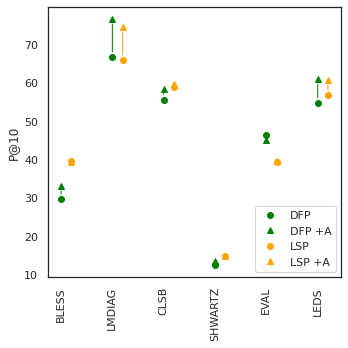

In [133]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme(style="white")
sns.set(style="white")
sns.color_palette("husl", 8)
from matplotlib import rcParams
rcParams['font.family'] = 'times'

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

# Draw a simple arrow between two points in axes coordinates
# within a single axes
# xyAs = [(1, 29.5), (2, 64.4), (3, 55.6), (4,14.2), (5, 44.9), (6, 54.8)] #DEFP
# xyBs = [(1, 37.5), (2, 63.9), (3, 56.2), (4,13.2), (5, 36.8), (6, 53.6)] #LSP 
xyAs = [(1, 29.6), (2, 66.8), (3, 55.6), (4,12.5), (5, 46.5), (6, 54.8)] #DEFP
xyBs = [(1, 33.1), (2, 76.7), (3, 58.5), (4,13.6), (5, 45.1), (6, 60.9)] #DEFP + anchor
for xyA, xyB in zip(xyAs, xyBs):
    coordsA = "data"
    coordsB = "data"
    con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                          arrowstyle="-", shrinkA=5, shrinkB=5,
                          mutation_scale=10, fc="w", color='green')
#     line1, = ax1.plot([xyA[0], xyB[0]], [xyA[1], xyB[1]], "o", color='green', label='DEF->+Anchor')
    line1, = ax1.plot(xyA[0], xyA[1], "o", color='green', label='DFP')
    line2, = ax1.plot(xyB[0], xyB[1], "^", color='green', label='DFP +A')
    ax1.add_artist(con)
    print(con)


xyAs = [(1.2, 39.5), (2.2, 66.1), (3.2, 59.0), (4.2,14.9), (5.2, 39.3), (6.2, 56.8)] #LSP 
xyBs = [(1.2, 39.3), (2.2, 74.5), (3.2, 59.7), (4.2,14.8), (5.2, 39.5), (6.2, 60.8)]#LSP+ Anchor 
for xyA, xyB in zip(xyAs, xyBs):
    coordsA = "data"
    coordsB = "data"
    con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                          arrowstyle="-", shrinkA=5, shrinkB=5,
                          mutation_scale=10, fc="w", color='orange')
#     line3, = ax1.plot([xyA[0], xyB[0]], [xyA[1], xyB[1]], "o", color='orange', label='LSP->+Anchor')
    line3, = ax1.plot(xyA[0], xyA[1], "o", color='orange', label='LSP')
    line4, = ax1.plot(xyB[0], xyB[1], "^", color='orange', label='LSP +A')
    ax1.add_artist(con)

# ax1.set_xlim(0, 1)
# ax1.set_ylim(0, 1)
# ax2.set_xlim(0, .5)
# ax2.set_ylim(0, .5)
ax1.set_xticklabels(['','BLESS', 'LMDIAG', 'CLSB', 'SHWARTZ', 'EVAL', 'LEDS'], rotation=90)
ax1.legend(handles=[line1, line2, line3, line4], loc='lower right') #, loc=(1,0.5))
# plt.legend(labels=['DEF->+Anchor', 'LSP ->+Anchor'], labelcolor=['green', 'orange'])
# plt.figure(dpi=1200)
plt.ylabel("P@10")
plt.tight_layout()
plt.savefig("../log/hypernym_sap_dap.pdf")
plt.show()

In [90]:
print(df.columns.get_level_values(level=0))
print(df.columns.get_level_values(level=1))
# df.sort_index(level=-1, ascending=True)

l0_col_index = ['BLESS', 'BLESS', 'BLESS', 'BLESS','LMDIAG', 'LMDIAG', 'LMDIAG', 'LMDIAG', 'CLSB', 'CLSB', 'CLSB', 'CLSB', 'EVAL', 'EVAL', 'EVAL', 'EVAL', 'LEDS', 'LEDS', 'LEDS', 'LEDS', 'SHWARTZ', 'SHWARTZ', 'SHWARTZ','SHWARTZ']

df = df.reindex(columns=l0_col_index, level=0)
df
# df['BLESS'].sort_index(axis=1, ascending=False)

Index(['BLESS', 'BLESS', 'BLESS', 'BLESS', 'CLSB', 'CLSB', 'CLSB', 'CLSB',
       'EVAL', 'EVAL', 'EVAL', 'EVAL', 'LEDS', 'LEDS', 'LEDS', 'LEDS',
       'LMDIAG', 'LMDIAG', 'LMDIAG', 'LMDIAG', 'SHWARTZ', 'SHWARTZ', 'SHWARTZ',
       'SHWARTZ'],
      dtype='object', name='dataset')
Index(['Acc&Cons', 'Cons', 'Plural', 'Singular', 'Acc&Cons', 'Cons', 'Plural',
       'Singular', 'Acc&Cons', 'Cons', 'Plural', 'Singular', 'Acc&Cons',
       'Cons', 'Plural', 'Singular', 'Acc&Cons', 'Cons', 'Plural', 'Singular',
       'Acc&Cons', 'Cons', 'Plural', 'Singular'],
      dtype='object')


NotImplementedError: Index._join_level on non-unique index is not implemented

In [88]:
# mi = pd.MultiIndex.from_arrays([[0, 0], [2, 1]])
# display(mi)
# mi.sortlevel()

df..sortlevel(-1, ascending=False)

AttributeError: 'DataFrame' object has no attribute 'MultiIndex'

Index(['\dapd', '\dapl', '\sapd', '\sapl'], dtype='object', name='Prompt')